In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import random

In [ ]:
x_min=-1
x_max=1
w=1
steps=100
h=1
m=1
g=1
k=1
mu=1
N=10
c1=1
c2=1
c3=1
v=1
k=1
phi=1
u=1

grid=np.linspace(x_min,x_max, steps)
V=.5*m*(w**2)*(grid**2)
deltax=(x_max-x_min)/steps

# Computing S_0

In [69]:
def calc_s0(psi_init, h, m, g, mu, x_max, x_min, steps,x_vec):
    
    #laplacian
    for i in range(1,len(psi_init)-1):
        laplacian=+-h**2/(2*m)*(np.conjugate(psi_init[i])*(psi_init[i+1]-2*psi_init[i]+psi_init[i-1])*psi_init[i]/((x_max-x_min)/steps))
    #print("Laplacian Term: ", laplacian)

    #Potential term
    potential_term=np.dot(V,psi_init)
    #print("Potential Term: ", potential_term)

    #Norm^4
    norm4=psi_init**4 #I feel like this needs to explicitly be something times complex conj...
    #print(norm4)
    norm4_term=integrate.simpson(norm4, x=x_vec)
    #print("Norm^4 Term: ", norm4_term)

    #Norm^2 (part of number operation)
    norm2=psi_init**2 #I feel like this needs to explicitly be something times complex conj...
    norm2_term=integrate.simpson(norm2, x=x_vec)
    #print("Norm^2 Term: ", norm2_term)

    S_0=-beta*(-laplacian+potential_term+(g/2)*norm4_term)-mu*norm2_term
    #print(S_0)

    return S_0

In [70]:
# s0_init=calc_s0(psi_0, h, m, g, mu, x_max, x_min, steps,grid)
# print(s0_init)

In [71]:
# # PERTURBATION
# rand=random.choice([0,1])

# if rand==0:
#     print("Generating density perturbation...")
#     psi=psi_0*(1+c1*v*np.sin(k*grid+phi))
# if rand==1:
#     print("Generating phase perturbation...")
#     psi=psi_0*np.exp((1j*c2*v*np.sin(k*grid+phi)))

# # Vary particle number
# psi=(1+c3*u)*psi

In [72]:
# # Calculate reduced energy of perturbed field
# s0_final=calc_s0(psi, h, m, g, mu, x_max, x_min, steps,grid)

In [73]:
def check_func(s0_final, s0_init, psi_new,psi_old):
    a=np.exp(s0_final-s0_init)
    print("value of a is: ", a)

    if a>=1:
        pass
        print("a does not meet acceptance criteria. Perturbation rejected.")
        accepted_s=s0_init
        psi_out=psi_old
    if a<1:
        rand=random.random() #generate random number between 0,1
        print("rand value is: ",rand)
        if rand<=a:
            psi_out=psi_new
            print("a meets acceptance criteria. Perturbation accepted.")
            accepted_s=s0_final
        else:
            pass
            print("a meets acceptance criteria. Perturbation rejected.")
            accepted_s=s0_init
            psi_out=psi_old
    return accepted_s, psi_out

In [74]:
# accepted_s=check_func(s0_final, s0_init)
# entropy_store.append(accepted_s)

In [96]:
# LOOP

iter=0
entropy_store=[]
T=1
beta=1/k*T
psi_0=(1/np.pi**.25)*np.exp(-0.5*grid**2)


while iter<100:

    print("Iteration: ", iter)

    #calculate inital entropy
    s0_init=calc_s0(psi_0, h, m, g, mu, x_max, x_min, steps,grid)
    print("Initial reduced entropy: ",s0_init)

    # PERTURBATION
    rand=random.choice([0,1])

    if rand==0:
        print("Generating density perturbation...")
        psi=psi_0*(1+c1*v*np.sin(k*grid+phi))
    if rand==1:
        print("Generating phase perturbation...")
        psi=psi_0*np.exp((1j*c2*v*np.sin(k*grid+phi)))

    # Vary particle number
    psi=(1+c3*u)*psi

    # Calculate reduced energy of perturbed field
    s0_final=calc_s0(psi, h, m, g, mu, x_max, x_min, steps,grid)
    print("Final reduced entropy: ", s0_final)

    # Accept or reject perturbation
    accepted_s, psi_0=check_func(np.real(s0_final), s0_init, psi, psi_0)
    entropy_store.append(accepted_s)

    iter+=1

Iteration:  0
Initial reduced entropy:  -10.523095167254333
Generating density perturbation...
Final reduced entropy:  -73.41796577418624
value of a is:  4.842891680156355e-28
rand value is:  0.48265541394510014
a meets acceptance criteria. Perturbation rejected.
Iteration:  1
Initial reduced entropy:  -10.523095167254333
Generating density perturbation...
Final reduced entropy:  -73.41796577418624
value of a is:  4.842891680156355e-28
rand value is:  0.5090348892122954
a meets acceptance criteria. Perturbation rejected.
Iteration:  2
Initial reduced entropy:  -10.523095167254333
Generating phase perturbation...
Final reduced entropy:  (-12.595772875501183-12.92059517209314j)
value of a is:  0.1258483449769086
rand value is:  0.7952148223065112
a meets acceptance criteria. Perturbation rejected.
Iteration:  3
Initial reduced entropy:  -10.523095167254333
Generating phase perturbation...
Final reduced entropy:  (-12.595772875501183-12.92059517209314j)
value of a is:  0.1258483449769086


[-10.523095167254333, -10.523095167254333, -10.523095167254333, -10.523095167254333, -10.523095167254333, -12.595772875501183, -12.850224257723323, (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.687544864787505j), (-12.850224257723323-41.68754486478

Text(0, 0.5, 'Reduced entropy')

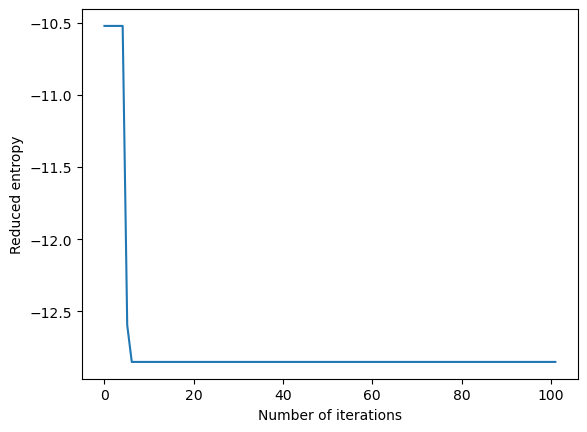

In [97]:
print(entropy_store)
fig=plt.figure()
plt.plot(np.linspace(0,iter+1,iter), entropy_store)
plt.xlabel("Number of iterations")
plt.ylabel("Reduced entropy")